<a href="https://colab.research.google.com/github/Nrashani/Python_learning/blob/Assignment/Version_2_Sales_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import .csv file to the notebooks

In [1]:
from google.colab import files

# here I am uploading a .csv file
uploaded = files.upload()

Saving Sales_Data_V2.csv to Sales_Data_V2.csv


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
# I am now going to ask Python to read my dataset
df = pd.read_csv('Sales_Data_V2.csv')

In [7]:
# This syntax is to check if my dataset is uploaded correctly. Becasue the RFS is based on the customer I wanted a table with columns such as CustomerNumber, payment date and amount.
df.head()

,Date,Product,Quantity,Price
0,2023-01-01,Apple,10,1.50
1,2023-01-01,Banana,15,0.75
2,2023-01-02,Apple,8,1.50
3,2023-01-02,Banana,20,0.75
4,2023-01-03,Apple,12,1.50


# Data Clearning

In [5]:
# Checking the missing values
print(df.isnull().sum())

Date        0
Product     0
Quantity    0
Price       0
dtype: int64


# Exporing Sales Data

This data set contains sales happened on a particular date. Each day different proddducts have been sold. The table contains price of a single unit and how much quantity was sold out. Now, I want to calculate the total sales for each day

In [16]:
Total_Sales = ['Quantity','Price']
print(df[Total_Sales].sum())

Quantity    311.0
Price        22.5
dtype: float64


In [18]:
# Above code didn't result in what I wanted to do, tryuing another way
df['Total_Price'] = df['Quantity']* df['Price']
print(df)

          Date Product  Quantity  Price  Total_Price
0   2023-01-01   Apple        10   1.50        15.00
1   2023-01-01  Banana        15   0.75        11.25
2   2023-01-02   Apple         8   1.50        12.00
3   2023-01-02  Banana        20   0.75        15.00
4   2023-01-03   Apple        12   1.50        18.00
5   2023-01-03  Banana        18   0.75        13.50
6   2023-01-04   Apple        15   1.50        22.50
7   2023-01-04  Banana        22   0.75        16.50
8   2023-01-05   Apple         7   1.50        10.50
9   2023-01-05  Banana        25   0.75        18.75
10  2023-01-06   Apple        11   1.50        16.50
11  2023-01-06  Banana        17   0.75        12.75
12  2023-01-07   Apple        14   1.50        21.00
13  2023-01-07  Banana        19   0.75        14.25
14  2023-01-08   Apple         9   1.50        13.50
15  2023-01-08  Banana        23   0.75        17.25
16  2023-01-09   Apple        13   1.50        19.50
17  2023-01-09  Banana        16   0.75       

Calculating the Total of Sales

In [20]:
Total_Sales = (df['Total_Price'].sum())
print(Total_Sales)

319.5


In [23]:
# Calculate Total Quantity Sold: Create a new column to represent the total quanitity of products sold each day
Total_Quantity = df['Quantity'].sum()
print(Total_Quantity)

311


In [29]:
# No, I need to know how many products solds each day
Total_Quantity = df.groupby('Date')['Quantity'].sum()
print(Total_Quantity)

Date
2023-01-01    25
2023-01-02    28
2023-01-03    30
2023-01-04    37
2023-01-05    32
2023-01-06    28
2023-01-07    33
2023-01-08    32
2023-01-09    29
2023-01-10    37
Name: Quantity, dtype: int64


I am trying to add total quantity as a new coluumn to the original dataframe


In [32]:
df['Total_Quantity'] = df.groupby('Date')['Quantity'].transform('sum')
print(df)

          Date Product  Quantity  Price  Total_Price  Total_Quantity
0   2023-01-01   Apple        10   1.50        15.00              25
1   2023-01-01  Banana        15   0.75        11.25              25
2   2023-01-02   Apple         8   1.50        12.00              28
3   2023-01-02  Banana        20   0.75        15.00              28
4   2023-01-03   Apple        12   1.50        18.00              30
5   2023-01-03  Banana        18   0.75        13.50              30
6   2023-01-04   Apple        15   1.50        22.50              37
7   2023-01-04  Banana        22   0.75        16.50              37
8   2023-01-05   Apple         7   1.50        10.50              32
9   2023-01-05  Banana        25   0.75        18.75              32
10  2023-01-06   Apple        11   1.50        16.50              28
11  2023-01-06  Banana        17   0.75        12.75              28
12  2023-01-07   Apple        14   1.50        21.00              33
13  2023-01-07  Banana        19  

Average Daily Sales - To calculate the average Daily sales I am going to use the Total_Quantity column

In [35]:
Daily_sales = df['Total_Quantity'].mean()
print("Average Daily Sales =", Daily_sales)

Average Daily Sales = 31.1


Find Best and Worst Sales Days: To identify the best sales day, I need to check the total of sales for each product on each day which I calculated earlier as Total_Price. So, then I can group by Date and take the sum of Total_Price to check worst and best sales days

In [65]:
Total_Sales = df.groupby('Date')['Total_Price'].sum()
print(Total_Sales)

Date
2023-01-01    26.25
2023-01-02    27.00
2023-01-03    31.50
2023-01-04    39.00
2023-01-05    29.25
2023-01-06    29.25
2023-01-07    35.25
2023-01-08    30.75
2023-01-09    31.50
2023-01-10    39.75
Name: Total_Price, dtype: float64


Based on the above output I can check the min and max values to check the best and the words sales dates.

In [59]:
best_sales_day = df.groupby('Date')['Total_Price'].sum().idxmax()
worst_sales_day = df.groupby('Date')['Total_Price'].sum().idxmin()
print("Best Sales Day:", best_sales_day)
print("Worst Sales Day:", worst_sales_day)

Best Sales Day: 2023-01-10
Worst Sales Day: 2023-01-01


# Further Analysis

Based on chatGPT reponse I am going to check the trend of sales overtime

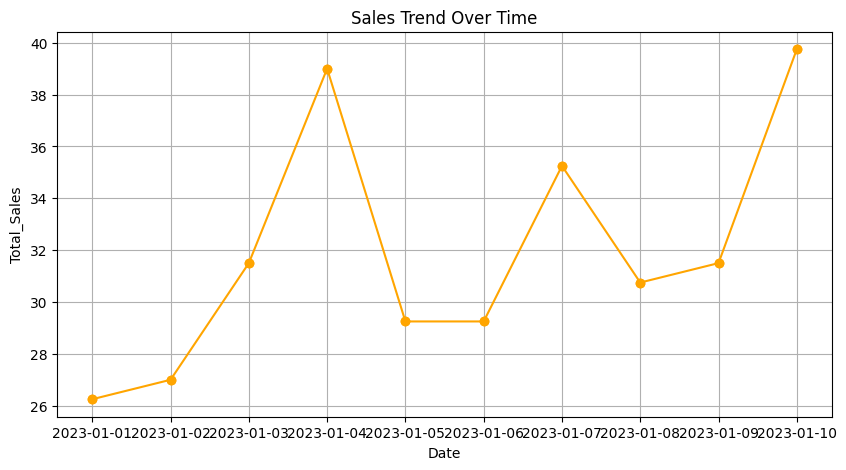

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total_Sales'], marker='o', linestyle='-', color='orange')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total_Sales')
plt.grid()
plt.show()

Then I am going to analyse if the certain day of the week has any impact on the sales

In [85]:
df['Weekday'] = df['Date'].dt.day_name()
print('Weekday')

Weekday


In [86]:
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
weekday_sales = df.groupby('Weekday')['Total_Price'].mean()
print(weekday_sales)


Weekday
Friday       14.6250
Monday       14.6250
Saturday     17.6250
Sunday       14.2500
Thursday     14.6250
Tuesday      17.8125
Wednesday    19.5000
Name: Total_Price, dtype: float64


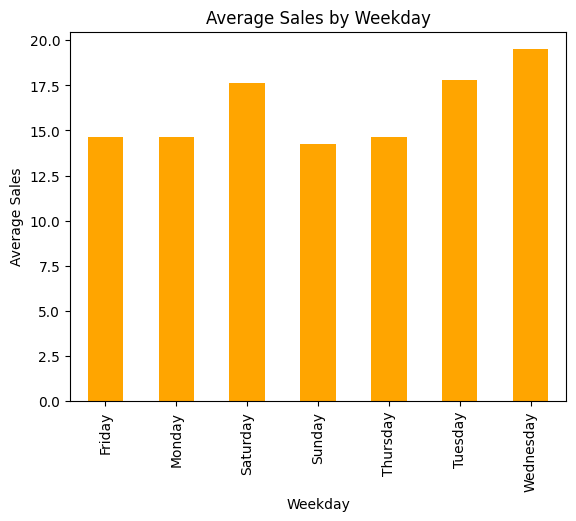

In [87]:
weekday_sales.plot(kind='bar', color='orange', title='Average Sales by Weekday')
plt.ylabel('Average Sales')
plt.xlabel('Weekday')
plt.show()

Moving Average -Smooths out day-to-day variations and highlights trends, helping to predict future performance.


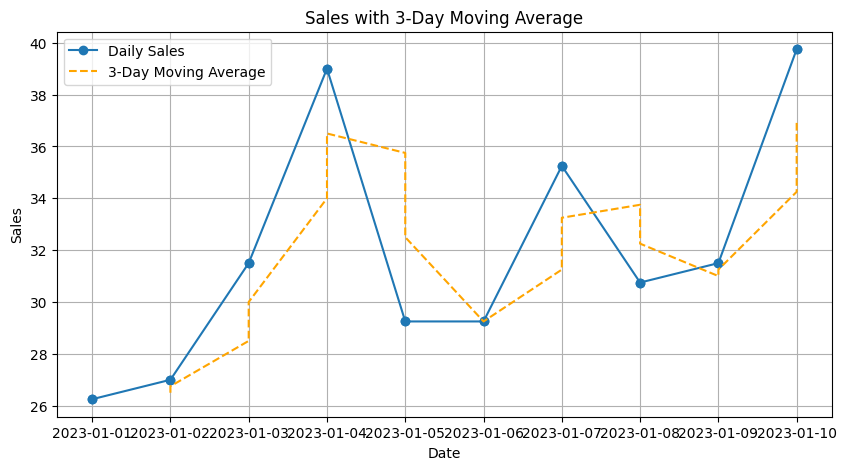

In [88]:
# Calculate a 3-day moving average
df['3-Day Moving Average'] = df['Total_Sales'].rolling(window=3).mean()

# Plot original sales and moving average
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total_Sales'], marker='o', label='Daily Sales')
plt.plot(df['Date'], df['3-Day Moving Average'], linestyle='--', color='orange', label='3-Day Moving Average')
plt.title('Sales with 3-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()